In [ ]:
def set_default(frame, e):
    cv2.putText(frame,'DEFAULT IMAGE', (0,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (160,255,255), 2)
    cv2.putText(frame, str(e), (0,100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2)
    cv2.imshow('frame',frame)


In [ ]:
import numpy as np
import cv2
import processer
from importlib import reload
cap = cv2.VideoCapture(0)
frame_number= 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    frame_number+=1
    reload(processer)
    try:
        processer.processer(frame, frame_number)
    except Exception as e:
        set_default(frame,e)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            cv2.circle(vis, (int(x), int(y)), 2, color)
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../imgs/naruto.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
print(corners.shape)
print(corners)
corners = corners.astype(int)

for i in corners:
    x,y = i.reshape(-1)
    cv2.circle(img,(x,y),10,(0,0,255),-1)

img = gray = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize = (30,30))
plt.imshow(img),plt.show()

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('../imgs/naruto.jpg',0)          # queryImage
img2 = cv2.imread('../imgs/naruto_distorted.jpg',0) # trainImage

# Initiate SIFT detector
orb = cv2.ORB_create()   

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

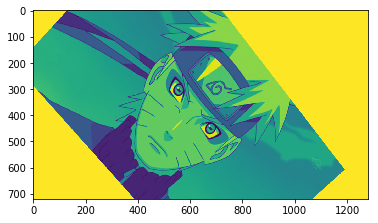

In [5]:
plt.imshow(img2)

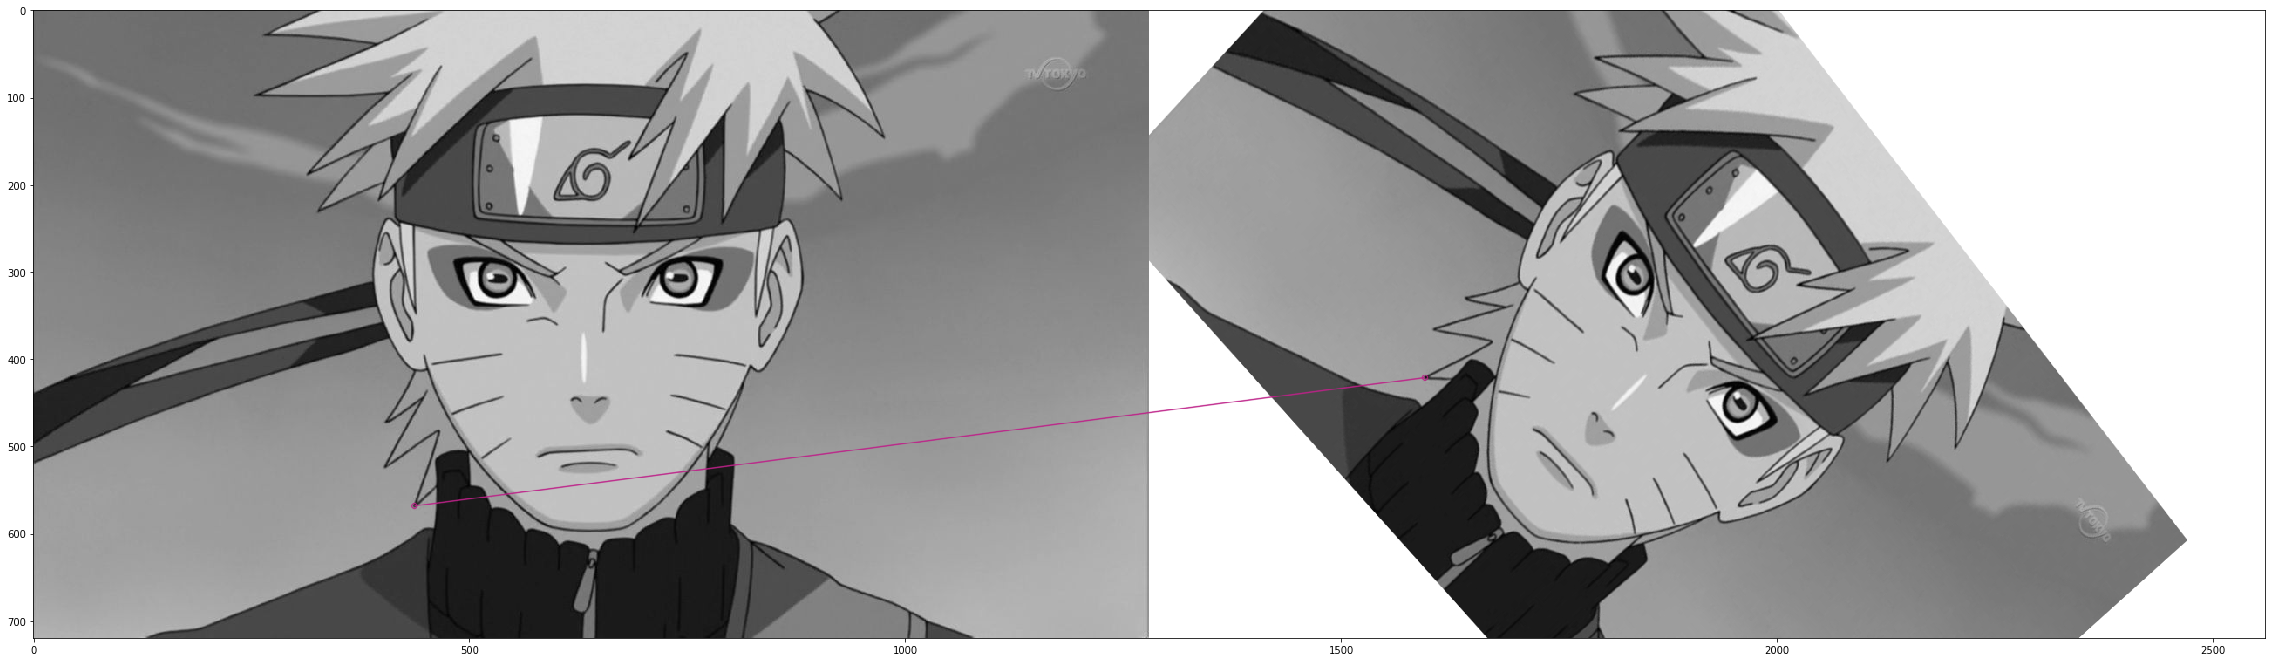

(<matplotlib.image.AxesImage at 0x7f72741574a8>, None)

In [15]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
img3=img2.copy()
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:1],outImg = img3, flags=2)
plt.figure(figsize = (40,40))
plt.imshow(img3),plt.show()

In [13]:
dir(matches[0]).queryIdx

AttributeError: 'list' object has no attribute 'queryIdx'

In [18]:
matches[0].trainIdx

57

In [17]:
kp1[33].pt

(437.0, 568.0)

In [19]:
kp2[57].pt

(316.0, 421.0)